<a href="https://colab.research.google.com/github/pacogp/SEMINARIO/blob/master/Seminario_Visualizaci%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision TreeClassifier Actividad2

**Importamos numpy y pandas y seleccionamos el Dataset para su carga**

**Leemos los datos en un DataFrame. Hay que tener en cuenta que los datos del dataset, las variables numéricas, sus decimales están separados por comas, por lo que hay que pasar el parámetro decimal="," a la función read_csv de pandas**

**Montamos el acceso a a Google Drive **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df= pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/raw/DATASET_BALANCEADO_PIEL_TELA.csv', sep=",", decimal=",")

## Visualizamos los datos 

In [ ]:
df.head()

,Fecha_Date,NUM_PLAZAS_,MECANISMO_MODULO,CATEGORIA,TIPO_TAPICERIA,Margen_Uds_linea,DTO_PP,I_COMISION,PROVINCIA,PIB_VALOR_EUROS,PARO_2020T3
0,2020-11-27 00:00:00,1,MOTOR,TU,P,290.20,89.84,66.03,28,34041.0,11.89
1,2020-11-27 00:00:00,1,MOTOR,TU,P,394.80,89.84,66.03,28,34041.0,11.89
2,2020-11-26 00:00:00,2,FIJO,FL,P,400.69,33.14,48.72,28,34041.0,11.89
3,2020-11-26 00:00:00,1,FIJO,FL,P,294.26,71.74,68.16,47,25482.0,10.98
4,2020-11-26 00:00:00,1,MOTOR,FL,P,306.14,66.28,48.72,28,34041.0,11.89


In [ ]:
df.tail()


,Fecha_Date,NUM_PLAZAS_,MECANISMO_MODULO,CATEGORIA,TIPO_TAPICERIA,Margen_Uds_linea,DTO_PP,I_COMISION,PROVINCIA,PIB_VALOR_EUROS,PARO_2020T3
3623,2020-10-21 00:00:00,1,MOTOR,S6,T,267.69,49.94,85.66,20,32015.0,8.47
3624,2020-10-21 00:00:00,1,MOTOR,S6,T,224.15,0.00,95.75,3,19066.0,15.67
3625,2020-10-21 00:00:00,1,MOTOR,S6,T,269.09,0.00,95.75,3,19066.0,15.67
3626,2020-10-21 00:00:00,0.5,RINCON,S6,T,43.88,0.00,0.00,30,20766.0,15.06
3627,2020-10-21 00:00:00,0.75,RINCON,S6,T,198.91,0.00,0.00,30,20766.0,15.06


In [ ]:
type(df)

pandas.core.frame.DataFrame

**vemos algunas características de las variables**

In [ ]:
df.describe()

,Margen_Uds_linea,DTO_PP,I_COMISION,PROVINCIA,PIB_VALOR_EUROS,PARO_2020T3
count,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000
mean,251.667420,23.176544,71.682122,23.767089,24901.203418,14.460317
std,119.666484,36.362073,69.172521,14.574227,5921.172044,4.638514
min,-196.300000,0.000000,0.000000,1.000000,17231.000000,8.470000
25%,184.715000,0.000000,35.620000,9.750000,19665.000000,10.980000
50%,255.950000,18.130000,58.415000,28.000000,22882.000000,11.890000
75%,316.230000,33.055000,90.760000,31.000000,29964.000000,16.700000
max,651.390000,612.060000,474.420000,50.000000,36921.000000,22.720000


In [ ]:
df.dtypes

Fecha_Date           object
NUM_PLAZAS_          object
MECANISMO_MODULO     object
CATEGORIA            object
TIPO_TAPICERIA       object
Margen_Uds_linea    float64
DTO_PP              float64
I_COMISION          float64
PROVINCIA             int64
PIB_VALOR_EUROS     float64
PARO_2020T3         float64
dtype: object

**Convertimos las variables objeto MECANISMO_MODULO, CATEGORIA Y TIPO_TAPICERIA (Variable Objetivo) a Float entendibles por el algoritmo**

In [ ]:
df.MECANISMO_MODULO.unique()

array(['MOTOR', 'FIJO', 'CH', 'POUFF', 'DESLIZANTE', 'RINCON', 'CAMA',
       'COJIN'], dtype=object)

In [ ]:
df_MEC = df.copy()
num_MEC = df_MEC["MECANISMO_MODULO"].unique()
map_to_int = {name: n for n, name in enumerate(num_MEC)}
df_MEC["MECANISMO_MODULO"] = df_MEC["MECANISMO_MODULO"].replace(map_to_int)

df_MEC.MECANISMO_MODULO.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
df_MEC.CATEGORIA.unique()

array(['TU', 'FL', 'GA', 'SF', 'S6', 'S4', 'S5', 'S7', 'S8'], dtype=object)

In [ ]:
df_CAT = df_MEC.copy()
num_CAT = df_CAT["CATEGORIA"].unique()
map_to_int = {name: n for n, name in enumerate(num_CAT)}
df_CAT["CATEGORIA"] = df_CAT["CATEGORIA"].replace(map_to_int)

df_CAT.CATEGORIA.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
df_CAT.TIPO_TAPICERIA.unique()

array(['P', 'T'], dtype=object)

In [ ]:
df_TAP = df_CAT.copy()
targets = df_TAP["TIPO_TAPICERIA"].unique()
map_to_int = {name: n for n, name in enumerate(targets)}
df_TAP["TIPO_TAPICERIA"] = df_TAP["TIPO_TAPICERIA"].replace(map_to_int)

df_TAP.TIPO_TAPICERIA.unique()

array([0, 1])

In [ ]:
df_TAP['NUM_PLAZAS_'] = df_TAP['NUM_PLAZAS_'].astype(float)

**Comprobamos que todas las variables se han convetrido**

In [ ]:
df_TAP.dtypes

Fecha_Date           object
NUM_PLAZAS_         float64
MECANISMO_MODULO      int64
CATEGORIA             int64
TIPO_TAPICERIA        int64
Margen_Uds_linea    float64
DTO_PP              float64
I_COMISION          float64
PROVINCIA             int64
PIB_VALOR_EUROS     float64
PARO_2020T3         float64
dtype: object

In [ ]:
df_TAP.head()

,Fecha_Date,NUM_PLAZAS_,MECANISMO_MODULO,CATEGORIA,TIPO_TAPICERIA,Margen_Uds_linea,DTO_PP,I_COMISION,PROVINCIA,PIB_VALOR_EUROS,PARO_2020T3
0,2020-11-27 00:00:00,1.0,0,0,0,290.20,89.84,66.03,28,34041.0,11.89
1,2020-11-27 00:00:00,1.0,0,0,0,394.80,89.84,66.03,28,34041.0,11.89
2,2020-11-26 00:00:00,2.0,1,1,0,400.69,33.14,48.72,28,34041.0,11.89
3,2020-11-26 00:00:00,1.0,1,1,0,294.26,71.74,68.16,47,25482.0,10.98
4,2020-11-26 00:00:00,1.0,0,1,0,306.14,66.28,48.72,28,34041.0,11.89


**Importamos algoritmos de clasificación**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Preparamos las features. Para ello generamos las listas necesarias en los rangos adecuados, teniendo en cunenta que la variable objetivo es TIPO_TAPICERIA

In [ ]:
dfmod1 = list(df_TAP.columns[1:4])

In [ ]:
dfmod1

['NUM_PLAZAS_', 'MECANISMO_MODULO', 'CATEGORIA']

In [ ]:
dfmod2 = list(df_TAP.columns[5:11])

In [ ]:
dfmod2

['Margen_Uds_linea',
 'DTO_PP',
 'I_COMISION',
 'PROVINCIA',
 'PIB_VALOR_EUROS',
 'PARO_2020T3']

**Concatenamos en una única lista todas las características necesarias y comprobamos**

In [ ]:
dfmod1 += dfmod2

In [ ]:
print("caractreristicas: ", dfmod1)


caractreristicas:  ['NUM_PLAZAS_', 'MECANISMO_MODULO', 'CATEGORIA', 'Margen_Uds_linea', 'DTO_PP', 'I_COMISION', 'PROVINCIA', 'PIB_VALOR_EUROS', 'PARO_2020T3']


In [ ]:
x = list(df_TAP.columns[1:4]) + list(df_TAP.columns[5:11])

In [ ]:
target_class =  list(df_TAP.columns[4:5])

In [ ]:
target_class

['TIPO_TAPICERIA']

In [ ]:
y = list(df_TAP.columns[4:5])
y

['TIPO_TAPICERIA']

**Preparamos las los datos y, X para la ejecuación del algoritmo y pintamos el tree**

In [ ]:
y = df_TAP["TIPO_TAPICERIA"]
X = df_TAP[(list(df_TAP.columns[1:4]) + list(df_TAP.columns[5:11]))]
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

[Text(167.4, 163.07999999999998, 'X[2] <= 3.5\ngini = 0.5\nsamples = 3628\nvalue = [1814, 1814]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 1814\nvalue = [1814, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1814\nvalue = [0, 1814]')]

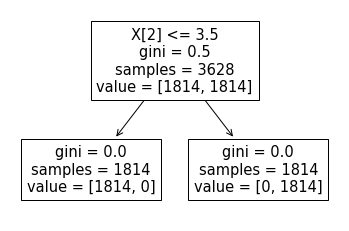

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

In [ ]:
import graphviz 

In [ ]:
features = list(df_TAP.columns[1:4]) + list(df_TAP.columns[5:11])

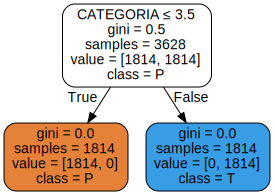

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=features,  class_names=targets, filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Nos damos cuenta que la característica CATEGORIA es una variable que está totalmente correlada y dependiente de nuestra variable objetivo P y T, por lo que la debemos eliminar del modelo y volver a recalcular nuevas features o carácterísticas sin la variable CATEGORIA**



In [ ]:
y = df_TAP["TIPO_TAPICERIA"]
X = df_TAP[(list(df_TAP.columns[1:3]) + list(df_TAP.columns[5:11]))]
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

[Text(191.70204683288412, 212.004, 'X[4] <= 69.755\ngini = 0.5\nsamples = 3628\nvalue = [1814, 1814]'),
 Text(95.03672506738545, 201.132, 'X[3] <= 23.555\ngini = 0.424\nsamples = 2141\nvalue = [653, 1488]'),
 Text(41.06037735849057, 190.26, 'X[5] <= 3.5\ngini = 0.308\nsamples = 1371\nvalue = [261, 1110]'),
 Text(8.121832884097035, 179.388, 'X[5] <= 2.5\ngini = 0.494\nsamples = 169\nvalue = [94, 75]'),
 Text(3.609703504043127, 168.516, 'X[4] <= 40.375\ngini = 0.258\nsamples = 46\nvalue = [7, 39]'),
 Text(1.8048517520215634, 157.644, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(5.41455525606469, 157.644, 'gini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(12.633962264150945, 168.516, 'X[4] <= 12.18\ngini = 0.414\nsamples = 123\nvalue = [87, 36]'),
 Text(9.024258760107816, 157.644, 'X[2] <= 204.01\ngini = 0.139\nsamples = 80\nvalue = [74, 6]'),
 Text(7.219407008086254, 146.772, 'X[2] <= 155.85\ngini = 0.305\nsamples = 32\nvalue = [26, 6]'),
 Text(5.41455525606469, 135.9, 'X[2] <= 

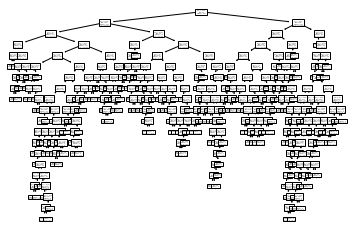

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

In [ ]:
import graphviz 

In [ ]:
features = list(df_TAP.columns[1:3]) + list(df_TAP.columns[5:11])
targets = df_CAT["TIPO_TAPICERIA"].unique()
targets

array(['P', 'T'], dtype=object)

In [ ]:
features

['NUM_PLAZAS_',
 'MECANISMO_MODULO',
 'Margen_Uds_linea',
 'DTO_PP',
 'I_COMISION',
 'PROVINCIA',
 'PIB_VALOR_EUROS',
 'PARO_2020T3']

**Para representar el árbol de una forma más entendible y visual ejecutamos lo siguiente:**

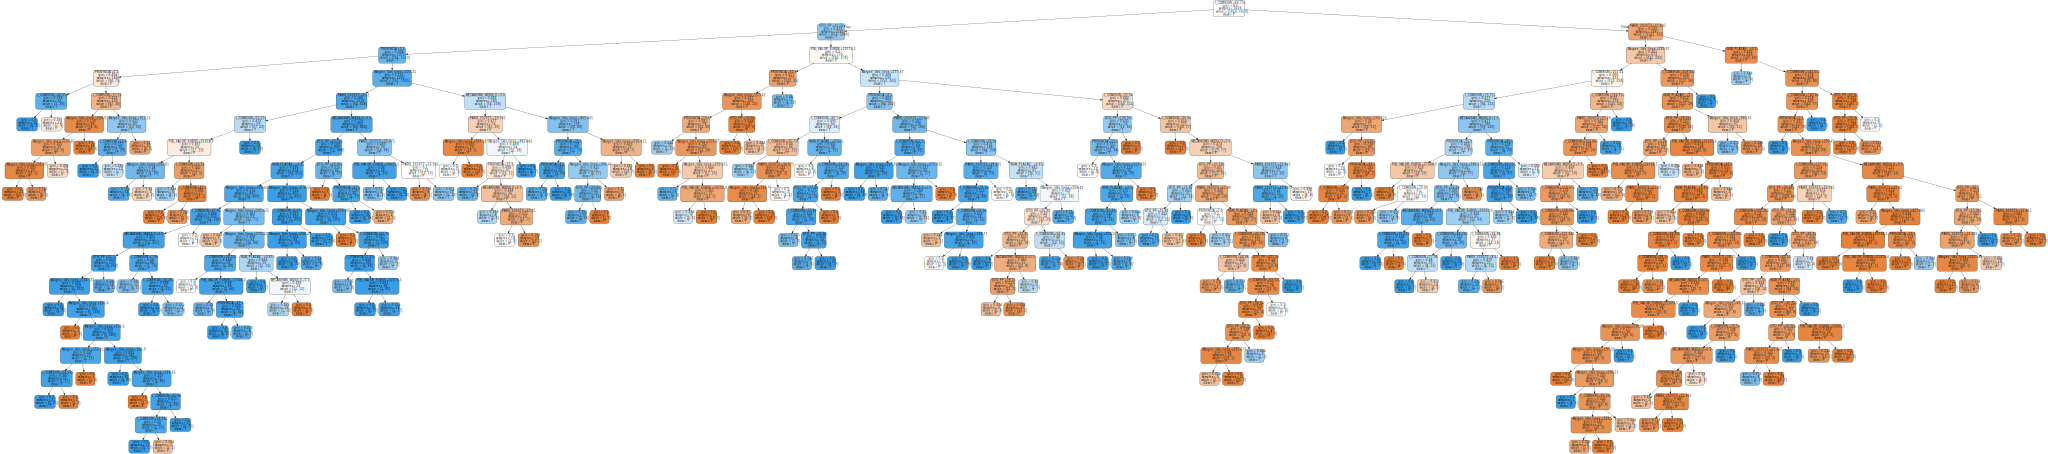

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=features,  class_names=targets, filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Si queremos exportar el seudocódigo para análisis posterior utilizamos

In [ ]:
from sklearn.tree.export import export_text
r = export_text(dt, feature_names=features)
print(r)


|--- I_COMISION <= 69.76
|   |--- DTO_PP <= 23.56
|   |   |--- PROVINCIA <= 3.50
|   |   |   |--- PROVINCIA <= 2.50
|   |   |   |   |--- I_COMISION <= 40.38
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- I_COMISION >  40.38
|   |   |   |   |   |--- class: 0
|   |   |   |--- PROVINCIA >  2.50
|   |   |   |   |--- I_COMISION <= 12.18
|   |   |   |   |   |--- Margen_Uds_linea <= 204.01
|   |   |   |   |   |   |--- Margen_Uds_linea <= 155.85
|   |   |   |   |   |   |   |--- Margen_Uds_linea <= 58.30
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Margen_Uds_linea >  58.30
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Margen_Uds_linea >  155.85
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Margen_Uds_linea >  204.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- I_COMISION >  12.18
|   |   |   |   |   |--- Margen_Uds_linea <= 312.16
|   |   |   |   |   |   |--- I_COMISION <= 52.80
|   |   | 

**Tras visualizar el arbol de decisión, lo que hacemos a continuación es ver y Validar cuan bueno o no es nuestro modelo. Para ello debemos dividir el conjunto de datos 60, 40 % para entrenamiento y test respectivamente. Importamos librería...**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.4, random_state=0)

**Mostramos las dimensiones de datos para entrenemiento y test, y creamos el modelo con el conjunto de test para evaluar %**

In [ ]:
 X_train.shape, y_train.shape

((2176, 8), (2176,))

In [ ]:
X_test.shape, y_test.shape

((1452, 8), (1452,))

In [ ]:
clf = DecisionTreeClassifier(min_samples_split=20, random_state=99).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.8491735537190083

**Tenemos como resultado un Score del 85%. Para ver si podemos mejorarlo intento dar más datos para entrenamiento 70% y 30% para test.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=0)

In [ ]:
clf = DecisionTreeClassifier(min_samples_split=20, random_state=99).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.8411386593204775

** Con lo que veo que no mejora nuestro score. por lo tanto aplicar el 60%-30%, es una mejor opción.

Ahora quiero poner a prueba el modelo mediante el método de **CrossValidation**... **

Importamos nueva librería al efecto... y evaluamos con 10 folds 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(clf, X, y, cv=10)

In [ ]:
print("Precisión: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precisión: 0.80 (+/- 0.07)


**Vemos que la precición no ha mejorado, por lo que seguimos teniendo el 85% como mejor score.**

A continuación vemos si con otras estrategias de validación podemos mejorar. **Utilizamos ShuffleSplit.** 

El resultado por este método es prácticamente el mismo que obtenemos en el árbol de decisión.

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)

array([0.84113866, 0.81726354, 0.82552801, 0.85399449, 0.82644628])